In [1]:
import numpy as np
import pandas as pd
import time
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten ,BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import tensorflow.keras as keras

In [3]:
traindata = np.load("traindata32.npy")
traindata_y = np.load("traindata_y.npy")

In [2]:
train_df=list()
f = open('../data/train.txt')
for line in f.readlines():
    #print(line)
    x = line.split()
    train_df.append(x)
f.close

traindata = np.zeros(shape=(1,32,32,3),dtype=int)
traindata_y = []
for i in range(len(train_df)):
    p1_1 = cv2.imread("../data/"+train_df[i][0])
    p1_2 = cv2.resize(p1_1, (32, 32))
    #p1_2 = np.swapaxes(p1_2,0,2)
    #p1_2 = np.swapaxes(p1_2,1,2)
    traindata = np.append(traindata,[p1_2], axis=0)
    traindata_y.append(int(train_df[i][1]))
    if i %1000 ==0:
        print("finish:",i)
traindata = traindata[1:]

np.save("traindata32.npy",traindata)
np.save("traindata_y.npy",traindata_y)
print(traindata.shape)

traindata_y = np.array(traindata_y)
print(len(traindata_y))

finish: 0
finish: 1000
finish: 2000
finish: 3000
finish: 4000
finish: 5000
finish: 6000
finish: 7000
finish: 8000
finish: 9000
finish: 10000
finish: 11000
finish: 12000
finish: 13000
finish: 14000
finish: 15000
finish: 16000
finish: 17000
finish: 18000
finish: 19000
finish: 20000
finish: 21000
finish: 22000
finish: 23000
finish: 24000
finish: 25000
finish: 26000
finish: 27000
finish: 28000
finish: 29000
finish: 30000
finish: 31000
finish: 32000
finish: 33000
finish: 34000
finish: 35000
finish: 36000
finish: 37000
finish: 38000
finish: 39000
finish: 40000
finish: 41000
finish: 42000
finish: 43000
finish: 44000
finish: 45000
finish: 46000
finish: 47000
finish: 48000
finish: 49000
finish: 50000
finish: 51000
finish: 52000
finish: 53000
finish: 54000
finish: 55000
finish: 56000
finish: 57000
finish: 58000
finish: 59000
finish: 60000
finish: 61000
finish: 62000
finish: 63000
(63325, 32, 32, 3)
63325


In [2]:
traindata = np.load("traindata32.npy")
traindata_y = np.load("traindata_y.npy")

In [3]:
test_df=list()
f = open('../data/test.txt')
for line in f.readlines():
    #print(line)
    x = line.split()
    test_df.append(x)
f.close

testdata = np.zeros(shape=(1,32,32,3),dtype=int)
testdata_y = []
for i in range(len(test_df)):
    p1_1 = cv2.imread("../data/"+test_df[i][0])
    p1_2 = cv2.resize(p1_1, (32, 32))
    #p1_2 = np.swapaxes(p1_2,0,2)
    #p1_2 = np.swapaxes(p1_2,1,2)
    testdata = np.append(testdata,[p1_2], axis=0)
    testdata_y.append(int(test_df[i][1]))
testdata = testdata[1:]

print(testdata.shape)

testdata_y = np.array(testdata_y)
print(len(testdata_y))

(450, 32, 32, 3)
450


In [4]:
val_df=list()
f = open('../data/val.txt')
for line in f.readlines():
    #print(line)
    x = line.split()
    val_df.append(x)
f.close

valdata = np.zeros(shape=(1,32,32,3),dtype=int)
valdata_y = []
for i in range(len(val_df)):
    p1_1 = cv2.imread("../data/"+val_df[i][0])
    p1_2 = cv2.resize(p1_1, (32, 32))
    #p1_2 = np.swapaxes(p1_2,0,2)
    #p1_2 = np.swapaxes(p1_2,1,2)
    valdata = np.append(valdata,[p1_2], axis=0)
    valdata_y.append(int(val_df[i][1]))
valdata = valdata[1:]

print(valdata.shape)

valdata_y = np.array(valdata_y)
print(len(valdata_y))

(450, 32, 32, 3)
450


# 靜態圖做法

In [33]:
model = Sequential()


model.add(Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(BatchNormalization())
model.add(Flatten())  
model.add(Dense(84, activation='relu'))  
model.add(Dense(50, activation='softmax'))  
model.summary()  



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 6)         24        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 5, 5, 16)          64        
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)              

In [34]:
from tensorflow.keras.optimizers import SGD

sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [35]:
traindata_y_keras = keras.utils.to_categorical(traindata_y, 50)
testdata_y_keras = keras.utils.to_categorical(testdata_y, 50)
valdata_y_keras = keras.utils.to_categorical(valdata_y, 50)

In [36]:
model.fit(traindata, traindata_y_keras, epochs=10, batch_size=100)

Epoch 1/10
634/634 [==============================] - 12s 19ms/step - loss: 3.4327 - accuracy: 0.1167
Epoch 2/10
634/634 [==============================] - 12s 19ms/step - loss: 3.0501 - accuracy: 0.1852
Epoch 3/10
634/634 [==============================] - 12s 18ms/step - loss: 2.9241 - accuracy: 0.2125
Epoch 4/10
634/634 [==============================] - 11s 18ms/step - loss: 2.8451 - accuracy: 0.2310
Epoch 5/10
634/634 [==============================] - 12s 18ms/step - loss: 2.7845 - accuracy: 0.2452
Epoch 6/10
634/634 [==============================] - 12s 18ms/step - loss: 2.7385 - accuracy: 0.2566
Epoch 7/10
634/634 [==============================] - 11s 18ms/step - loss: 2.7001 - accuracy: 0.2672
Epoch 8/10
634/634 [==============================] - 12s 18ms/step - loss: 2.6667 - accuracy: 0.2731
Epoch 9/10
634/634 [==============================] - 11s 18ms/step - loss: 2.6338 - accuracy: 0.2792
Epoch 10/10
634/634 [==============================] - 11s 18ms/step - loss: 2.607

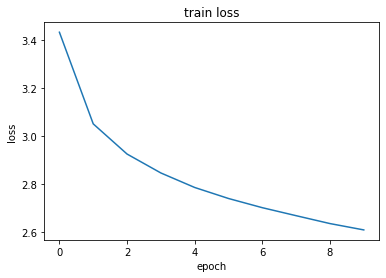

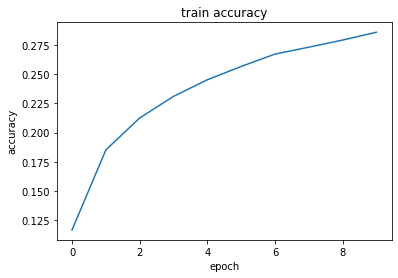

In [44]:
epoch = [0,1,2,3,4,5,6,7,8,9]
loss=[3.4327,3.0501 ,2.9241,2.8451,2.7845,2.7385,2.7001,2.6667,2.6338,2.6073]
accuracy = [0.1167,0.1852,0.2125,0.2310,0.2452,0.2566,0.2672,0.2731,0.2792,0.2859]

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(epoch, loss)
plt.title('train loss')  # 添加子标题
plt.xlabel('epoch', fontsize=10)  # 添加轴标签
plt.ylabel('loss', fontsize=10)
fig.savefig('model1_loss.png')

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(epoch, accuracy)
plt.title('train accuracy')  # 添加子标题
plt.xlabel('epoch', fontsize=10)  # 添加轴标签
plt.ylabel('accuracy', fontsize=10)
fig.savefig('model1_acc.png')

In [39]:
y_pred_test = model.predict(testdata)
y_pred_val = model.predict(valdata)

labels_test = np.argmax(y_pred_test, axis = 1)
labels_val = np.argmax(y_pred_val, axis = 1)

#np.savetxt("out_test.csv", labels_test, delimiter=",")
#np.savetxt("out_val.csv", labels_val, delimiter=",")

In [40]:
print(sum(labels_test == testdata_y)/len(testdata_y))
print(sum(labels_val == valdata_y)/len(valdata_y))

0.24444444444444444
0.24222222222222223


# puring

In [37]:
import tensorflow_model_optimization as tfmot
batch_size=100
epochs = 10
prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude
num_images = len(traindata)
end_step = np.ceil(num_images / batch_size).astype(np.int32) * epochs
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.50,
                                                               final_sparsity=0.80,
                                                               begin_step=0,
                                                               end_step=end_step)
}

model_for_pruning = prune_low_magnitude(model, **pruning_params)

# `prune_low_magnitude` requires a recompile.
model_for_pruning.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_for_pruning.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_conv2d_2 (None, 28, 28, 6)         908       
_________________________________________________________________
prune_low_magnitude_max_pool (None, 14, 14, 6)         1         
_________________________________________________________________
prune_low_magnitude_batch_no (None, 14, 14, 6)         25        
_________________________________________________________________
prune_low_magnitude_conv2d_3 (None, 10, 10, 16)        4818      
_________________________________________________________________
prune_low_magnitude_max_pool (None, 5, 5, 16)          1         
_________________________________________________________________
prune_low_magnitude_batch_no (None, 5, 5, 16)          65        
_________________________________________________________________
prune_low_magnitude_flatten_ (None, 400)              

In [38]:
import tempfile
logdir = tempfile.mkdtemp()

callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
]
model_for_pruning.fit(traindata, traindata_y_keras,
                  batch_size=100, epochs=10,
                  callbacks=callbacks)

Epoch 1/10
634/634 [==============================] - 13s 19ms/step - loss: 2.6296 - accuracy: 0.2815
Epoch 2/10
634/634 [==============================] - 12s 18ms/step - loss: 2.6216 - accuracy: 0.2810
Epoch 3/10
634/634 [==============================] - 12s 18ms/step - loss: 2.6255 - accuracy: 0.2809
Epoch 4/10
634/634 [==============================] - 12s 18ms/step - loss: 2.6340 - accuracy: 0.2780
Epoch 5/10
634/634 [==============================] - 12s 18ms/step - loss: 2.6395 - accuracy: 0.2803
Epoch 6/10
634/634 [==============================] - 12s 18ms/step - loss: 2.6462 - accuracy: 0.2772
Epoch 7/10
634/634 [==============================] - 12s 18ms/step - loss: 2.6472 - accuracy: 0.2776
Epoch 8/10
634/634 [==============================] - 12s 18ms/step - loss: 2.6419 - accuracy: 0.2792
Epoch 9/10
634/634 [==============================] - 12s 18ms/step - loss: 2.6365 - accuracy: 0.2812
Epoch 10/10
634/634 [==============================] - 12s 18ms/step - loss: 2.627

In [41]:
y_pred_test = model_for_pruning.predict(testdata)
y_pred_val = model_for_pruning.predict(valdata)

labels_test = np.argmax(y_pred_test, axis = 1)
labels_val = np.argmax(y_pred_val, axis = 1)

print(sum(labels_test == testdata_y)/len(testdata_y))
print(sum(labels_val == valdata_y)/len(valdata_y))

0.24444444444444444
0.24222222222222223


 # 動態圖作法

In [127]:
#在這個版本中，神經網路各層設置一樣，只差在額外指定初始化權重的方式，否則在動態圖的方式中網路不會自己初始化。
model2 = Sequential()


model2.add(Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3), kernel_initializer='random_uniform'))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))
model2.add(BatchNormalization())
model2.add(Conv2D(16, (5, 5), activation='relu', kernel_initializer='random_uniform'))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))
model2.add(BatchNormalization())
model2.add(Flatten())  
model2.add(Dense(84, activation='relu', kernel_initializer='random_uniform'))  
model2.add(Dense(50, activation='softmax', kernel_initializer='random_uniform'))  


model2.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

def train_step(inputs, labels):
    with tf.GradientTape() as tape:
        predictions = model2(inputs)
        
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model2.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model2.trainable_variables))
    return loss

In [128]:
print("train start , ","epoch=0 , ",time.strftime("%Y-%m-%d %H:%M:%S"))  

# 訓練模型
batch = 100
for epoch in range(10):
    running_loss = 0.0
    rl = list(range(len(traindata)))
    random.shuffle(rl)
    suffdata = traindata[rl]
    suffdata_y = traindata_y[rl]
    n = len(traindata)//batch
    for j in range(n):
        train_data = suffdata[batch*(j):batch*(1+j)]
        train_y = suffdata_y[batch*(j):batch*(1+j)] 
        loss = train_step(train_data, train_y)
        running_loss += loss
    print("epoch=",epoch," , ",time.strftime("%Y-%m-%d %H:%M:%S"))    
    print(f"Epoch {epoch} loss: {running_loss/len(traindata)}")
    y_pred_train = np.argmax(model2.predict(traindata), axis=1)
    y_pred_test = np.argmax(model2.predict(testdata), axis=1)
    
    train_acc = sum(y_pred_train==traindata_y)/len(traindata)
    test_acc = sum(y_pred_test==testdata_y)/len(testdata)
    
    print("train acc=%.4f"%train_acc)
    print("test  acc=%.4f"%test_acc)
    print("#======================================================")
y_pred_val = np.argmax(model2.predict(valdata), axis=1)
val_acc = sum(y_pred_val==valdata_y)/len(valdata)

train start ,  epoch=0 ,  2023-05-28 18:52:31
epoch= 0  ,  2023-05-28 18:52:51
Epoch 0 loss: 0.03909025341272354
train acc=0.0203
test  acc=0.0222
#======================================================
epoch= 1  ,  2023-05-28 18:53:15
Epoch 1 loss: 0.03907619044184685
train acc=0.0252
test  acc=0.0311
#======================================================
epoch= 2  ,  2023-05-28 18:53:40
Epoch 2 loss: 0.0390607975423336
train acc=0.0203
test  acc=0.0200
#======================================================
epoch= 3  ,  2023-05-28 18:54:05
Epoch 3 loss: 0.03897368535399437
train acc=0.0299
test  acc=0.0356
#======================================================
epoch= 4  ,  2023-05-28 18:54:29
Epoch 4 loss: 0.03694469854235649
train acc=0.0866
test  acc=0.0978
#======================================================
epoch= 5  ,  2023-05-28 18:54:54
Epoch 5 loss: 0.035528190433979034
train acc=0.1081
test  acc=0.0889
#======================================================
epoch= 6  , 

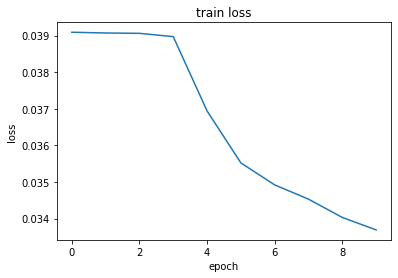

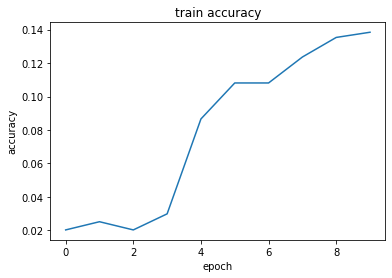

In [46]:
epoch = [0,1,2,3,4,5,6,7,8,9]
loss=[0.03909,0.03907 ,0.03906,0.03897,0.03694,0.03552,0.03492,0.03453,0.03403,0.03369]
accuracy = [0.0203,0.0252,0.0203,0.0299,0.0866,0.1081,0.1081,0.1236,0.1353,0.1384]

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(epoch, loss)
plt.title('train loss')  # 添加子标题
plt.xlabel('epoch', fontsize=10)  # 添加轴标签
plt.ylabel('loss', fontsize=10)
fig.savefig('model2_loss.png')

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(epoch, accuracy)
plt.title('train accuracy')  # 添加子标题
plt.xlabel('epoch', fontsize=10)  # 添加轴标签
plt.ylabel('accuracy', fontsize=10)
fig.savefig('model2_acc.png')

In [134]:
val_acc

0.10666666666666667

# pytorch

In [20]:
from torch import nn
from torch.nn import functional as F
from torch.autograd import Variable
import math
import torch
import random
class LeNet5(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5, padding=2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        #self.fc1 = nn.Linear(16*5*5, 120)
        self.fc1 = nn.Linear(576, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 50)
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [21]:
model3 = LeNet5()


criterion = nn.CrossEntropyLoss(reduction="sum")
optimizer = torch.optim.Adam(model3.parameters(), lr=1e-3, betas=(0.9, 0.99))

def weight_init(m):
# 使用isinstance来判断m属于什么类型
    if isinstance(m, nn.Conv2d):
        n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
        m.weight.data.normal_(0, math.sqrt(2. / n))
    elif isinstance(m, nn.BatchNorm2d):
# m中的weight，bias其实都是Variable，为了能学习参数以及后向传播
       m.weight.data.fill_(1)
       m.bias.data.zero_()

model3.apply(weight_init)

LeNet5(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=50, bias=True)
)

In [131]:
def train(epoch,data,data_y,batch,record):
    model3.train()
    #只取能整除的部分做訓練
    n = len(data)//batch
    #每次疊代都重新打亂，
    rl = list(range(len(data)))
    random.shuffle(rl)
    suffdata = data[rl]
    suffdata_y = data_y[rl]
    
    correct=0
    i = 0
    for j in range(n):
        train_data = suffdata[batch*(j):batch*(1+j)]
        train_y = suffdata_y[batch*(j):batch*(1+j)]
        optimizer.zero_grad()
        output = model3(train_data)
        loss = criterion(output, train_y)
        pred = output.data.max(1, keepdim=True)[1]
        true = train_y.data.max(1, keepdim=True)[1]
        correct += sum(pred==true)
        i+=len(pred)
        loss.backward()
        optimizer.step()
        if j %100 == 0 :
            print("train epoch:%d , batch:%d , loss:%.6f , acc:%.6f"%(epoch,j,loss.data,correct/i))    
    print("train epoch:%d , batch:%d , loss:%.6f , acc:%.6f"%(epoch,j,loss.data,correct/i))
    record.append([epoch,loss.data,correct/i])
    return(record)
def test(epoch,data,data_y):
    model3.eval()

    optimizer.zero_grad()
    output = model3(data)
    loss = criterion(output, data_y)
    pred = output.data.max(1, keepdim=True)[1]
    true = data_y.data.max(1, keepdim=True)[1]
    correct = sum(pred==true)
    i=len(pred)
    print("test epoch:%d ,          , loss:%.6f , acc:%.6f"%(epoch,loss.data,correct/i))


In [132]:
traindata_tensor = torch.from_numpy(np.swapaxes(traindata,1,3)).float()
traindata_y_tensor = torch.from_numpy(traindata_y_keras).float()

testdata_tensor = torch.from_numpy(np.swapaxes(testdata,1,3)).float()
testdata_y_tensor = torch.from_numpy(testdata_y_keras).float()

valdata_tensor = torch.from_numpy(np.swapaxes(valdata,1,3)).float()
valdata_y_tensor = torch.from_numpy(valdata_y_keras).float()



In [133]:
record = []
for epoch in range(10):
    print("epoch=",epoch," , ",time.strftime("%Y-%m-%d %H:%M:%S"))
    record = train(epoch,traindata_tensor,traindata_y_tensor,batch=100,record=record)
    test(epoch,testdata_tensor,testdata_y_tensor)

test(epoch,valdata_tensor,valdata_y_tensor)
print("epoch=",epoch," , ",time.strftime("%Y-%m-%d %H:%M:%S"))
record

epoch= 0  ,  2023-05-28 18:56:35
train epoch:0 , batch:0 , loss:1378.164673 , acc:0.000000
train epoch:0 , batch:100 , loss:384.367645 , acc:0.029604
train epoch:0 , batch:200 , loss:359.681610 , acc:0.041095
train epoch:0 , batch:300 , loss:363.678070 , acc:0.050864
train epoch:0 , batch:400 , loss:345.730774 , acc:0.058304
train epoch:0 , batch:500 , loss:333.163116 , acc:0.066128
train epoch:0 , batch:600 , loss:336.051086 , acc:0.072047
train epoch:0 , batch:632 , loss:330.282562 , acc:0.074439
test epoch:0 ,          , loss:1510.309692 , acc:0.131111
epoch= 1  ,  2023-05-28 18:56:43
train epoch:1 , batch:0 , loss:328.826538 , acc:0.160000
train epoch:1 , batch:100 , loss:335.892151 , acc:0.128119
train epoch:1 , batch:200 , loss:335.370117 , acc:0.128806
train epoch:1 , batch:300 , loss:332.420959 , acc:0.127973
train epoch:1 , batch:400 , loss:315.779175 , acc:0.129077
train epoch:1 , batch:500 , loss:324.105469 , acc:0.130220
train epoch:1 , batch:600 , loss:311.250427 , acc:0.1

[[0, tensor(330.2826), tensor([0.0744])],
 [1, tensor(310.3418), tensor([0.1321])],
 [2, tensor(308.4028), tensor([0.1646])],
 [3, tensor(295.0576), tensor([0.1853])],
 [4, tensor(301.9172), tensor([0.2053])],
 [5, tensor(289.3870), tensor([0.2220])],
 [6, tensor(292.0494), tensor([0.2349])],
 [7, tensor(273.0279), tensor([0.2480])],
 [8, tensor(242.3294), tensor([0.2557])],
 [9, tensor(266.5336), tensor([0.2677])]]

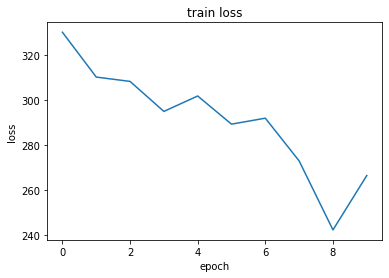

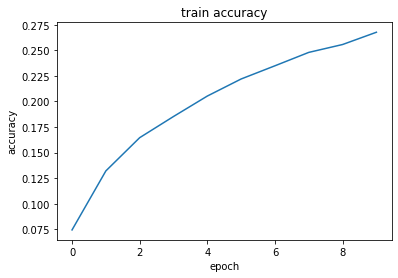

In [47]:
epoch = [0,1,2,3,4,5,6,7,8,9]
loss=[330.2826,310.3418,308.4028,295.0576,301.9172,289.3870,292.0494,273.0279,242.3294,266.5336]
accuracy = [0.0744,0.1321,0.1646,0.1853,0.2053,0.2220,0.2349,0.2480,0.2557,0.2677]

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(epoch, loss)
plt.title('train loss')  # 添加子标题
plt.xlabel('epoch', fontsize=10)  # 添加轴标签
plt.ylabel('loss', fontsize=10)
fig.savefig('model3_loss.png')

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(epoch, accuracy)
plt.title('train accuracy')  # 添加子标题
plt.xlabel('epoch', fontsize=10)  # 添加轴标签
plt.ylabel('accuracy', fontsize=10)
fig.savefig('model3_acc.png')

In [15]:
output = model3(valdata_tensor)
pred = output.data.max(1, keepdim=True)[1]
